<a href="https://colab.research.google.com/github/fongbubble/UoB_MGRCM0034_Group8_Car_Sales/blob/main/CarSaleCustomerSegment_PCA_w__Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\text{Supanu Tanatammatid 2546980}$$

### Package

In [41]:
# Basic libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and clustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import GridSearchCV

# Statsmodels for statistical analysis
import statsmodels.formula.api as smf

# For terminal output styling
from colorama import Fore, Style, init

# Colormap utilities
import matplotlib.cm as cm

### Data review

In [42]:
path = kagglehub.dataset_download("missionjee/car-sales-report")
print("Path to dataset files:", path)
files = os.listdir(path)
csv_file_path = os.path.join(path, files[0])
df = pd.read_csv(csv_file_path)
df.head(5)

Path to dataset files: /root/.cache/kagglehub/datasets/missionjee/car-sales-report/versions/1


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [43]:
# DataFrame summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [44]:
# Count duplicate rows
df.duplicated().sum()

0

In [45]:
# List unique values in 'Body Style' column
df['Body Style'].unique()

array(['SUV', 'Passenger', 'Hatchback', 'Hardtop', 'Sedan'], dtype=object)

### Correlation Heatmap

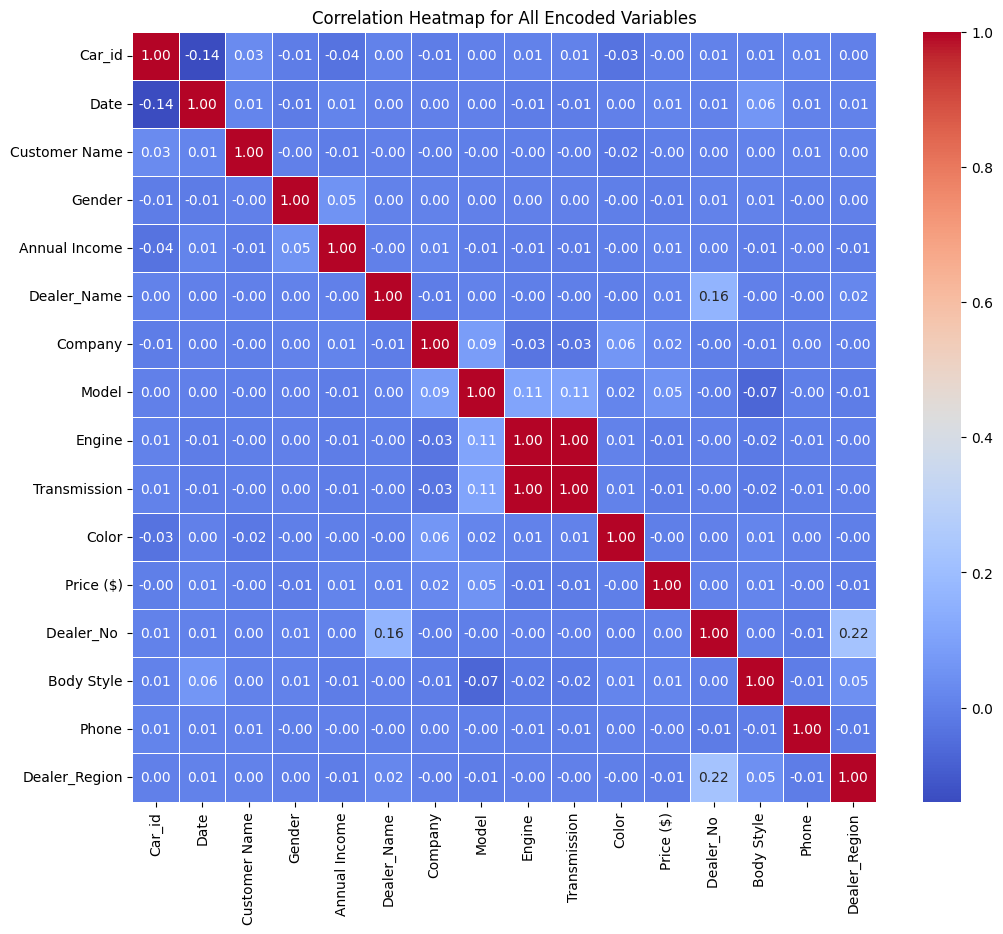

In [46]:
encoded_df = df.copy()
label_encoder = LabelEncoder()
for column in encoded_df.columns:
    if encoded_df[column].dtype == 'object':
        encoded_df[column] = label_encoder.fit_transform(encoded_df[column])
corr_matrix = encoded_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap for All Encoded Variables')
plt.show()

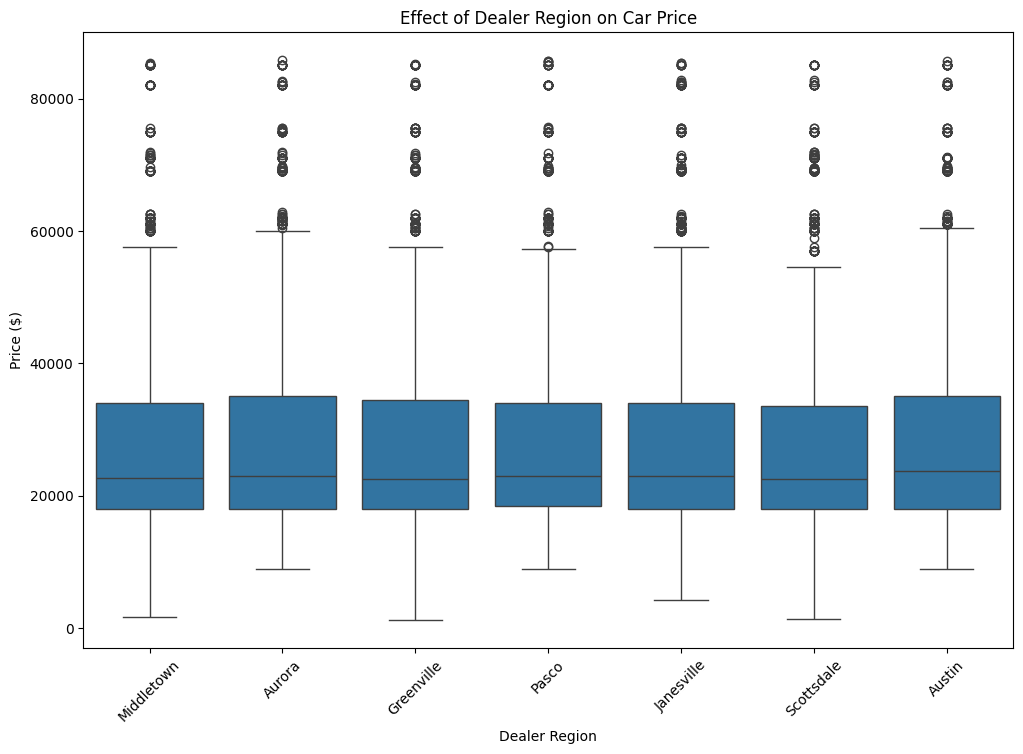

                            OLS Regression Results                            
Dep. Variable:         Q("Price ($)")   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7335
Date:                Mon, 02 Dec 2024   Prob (F-statistic):              0.623
Time:                        16:20:49   Log-Likelihood:            -2.6345e+05
No. Observations:               23906   AIC:                         5.269e+05
Df Residuals:                   23899   BIC:                         5.270e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [47]:
# Analyze how region affects the price of the car using a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.title('Effect of Dealer Region on Car Price')
plt.xticks(rotation=45)
plt.show()

# Linear regression to quantify the effect of region on price
model = smf.ols('Q("Price ($)") ~ C(Dealer_Region)', data=df).fit()
print(model.summary())

### Label Encoder

In [48]:
# Encode columns using LabelEncoder
columns_to_encode = ['Gender', 'Transmission', 'Body Style', 'Company', 'Model']
for col in columns_to_encode:
    df[f'{col}_Encoded'] = LabelEncoder().fit_transform(df[col])

### Standard Scaler

In [49]:
# Add Gender, Transmission, and Body Style to the feature matrix
X1 = df[['Annual Income', 'Price ($)', 'Company_Encoded', 'Model_Encoded']]
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

### Scatter plot

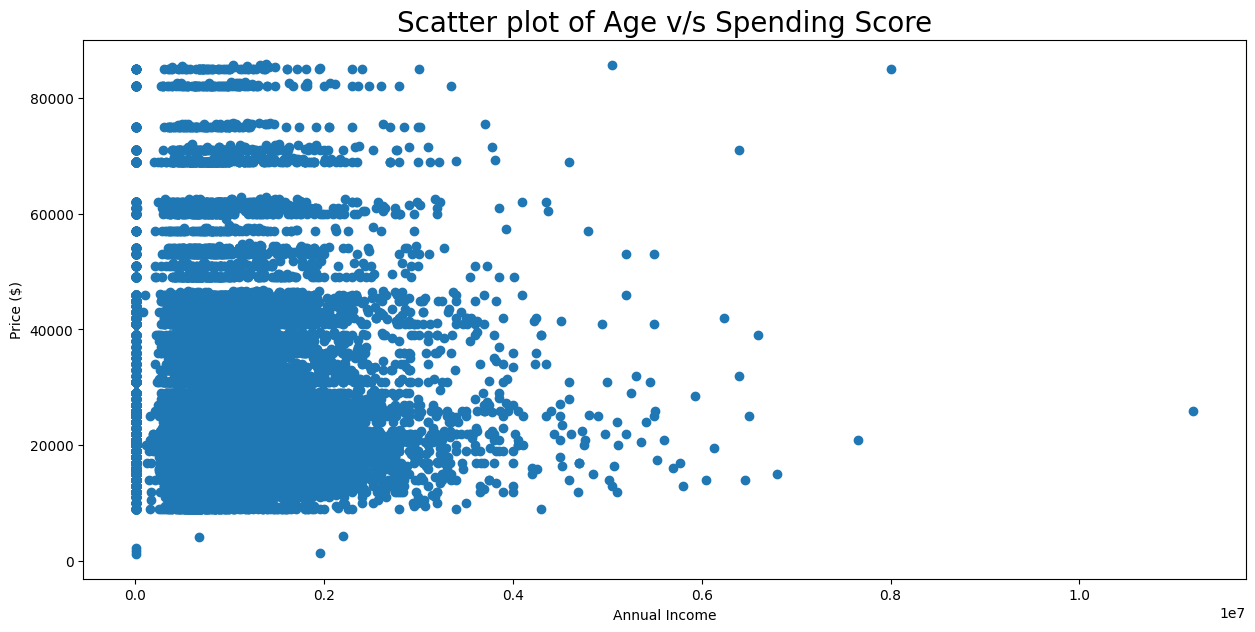

In [50]:
# Scatter plot of 'Annual Income' vs. 'Price ($)'
plt.figure(1, figsize=(15, 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.scatter(x='Annual Income', y='Price ($)', data=df)
plt.show()

### Finding number of cluster by using elbow method

     Annual Income  Price ($)  Company_Encoded  Model_Encoded
PC1       0.059878   0.433216         0.604504       0.665818
PC2       0.953299   0.236723        -0.074452      -0.172160


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


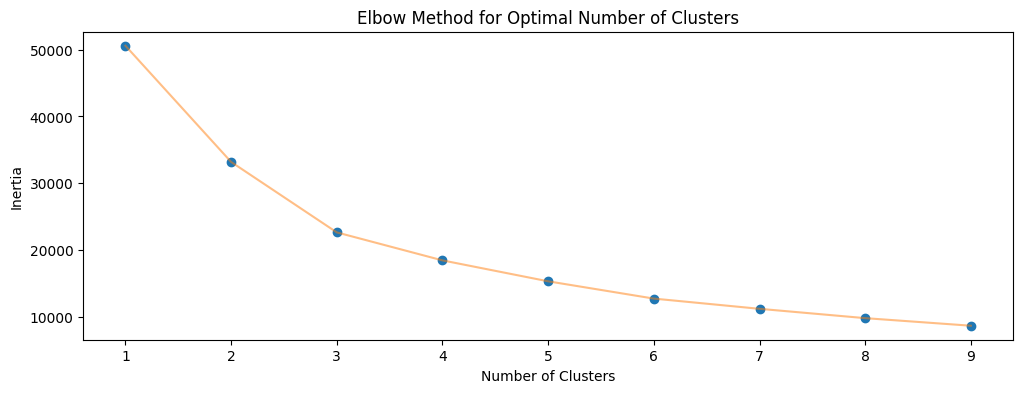

In [51]:
# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X1_pca = pca.fit_transform(X1_scaled)

# Create DataFrame to visualize contributions of features to each principal component
components = pca.components_
features = ['Annual Income', 'Price ($)', 'Company_Encoded', 'Model_Encoded']
components_df = pd.DataFrame(components, columns=features, index=['PC1', 'PC2'])
print(components_df)

# Calculate inertia for different numbers of clusters to use the Elbow Method
inertia = []
for n in range(1, 10):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300,
                       tol=0.0001, random_state=24150, algorithm='elkan')
    algorithm.fit(X1_pca)
    inertia.append(algorithm.inertia_)

# Plot the Elbow Method to determine the optimal number of clusters
plt.figure(1, figsize=(12, 4))
plt.plot(np.arange(1, 10), inertia, 'o')
plt.plot(np.arange(1, 10), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


### Feature Contribution

<ipython-input-52-e989d57d0f92>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  spectral_colors = cm.get_cmap('Spectral', len(features))


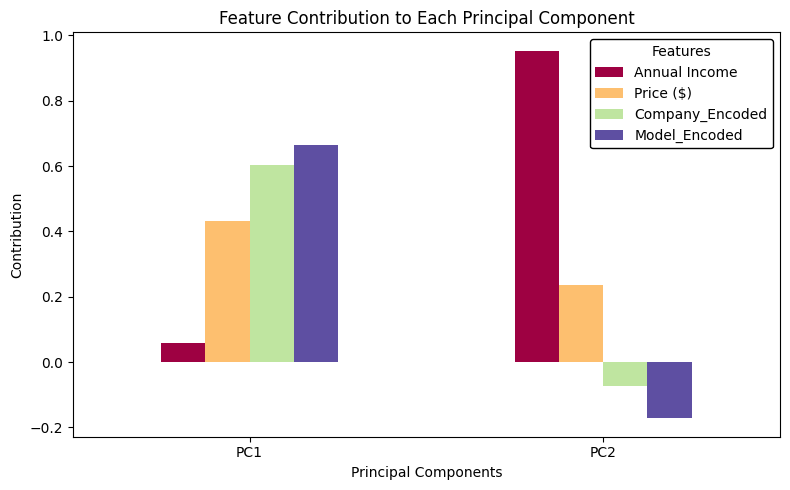

In [52]:
# Bar plot showing feature contribution to each principal component
components_df = pd.DataFrame(components, columns=features, index=['PC1', 'PC2'])
spectral_colors = cm.get_cmap('Spectral', len(features))
ax = components_df.plot(kind='bar', figsize=(8, 5), color=[spectral_colors(i) for i in range(len(features))])

plt.title('Feature Contribution to Each Principal Component')
plt.ylabel('Contribution')
plt.xlabel('Principal Components')
plt.xticks(rotation=0)
plt.legend(title='Features', loc='upper right', fancybox=True, framealpha=1, edgecolor='black', facecolor='white')
plt.tight_layout()  # Prevent clipping
plt.show()

### GridSearch to tune hyperparameter

In [53]:
# Define parameter grid for hyperparameter tuning using GridSearchCV
param_grid = {
    'n_clusters': [3, 4, 5, 6, 7, 8, 9],
    'init': ['k-means++', 'random'],
    'max_iter': [300, 500],
    'algorithm': ['auto', 'elkan']
}

# Perform grid search to find the best parameters for K-Means
kmeans = KMeans(random_state=24150)
grid_search = GridSearchCV(kmeans, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X1_pca)

# Use the best model identified by GridSearchCV
best_algorithm = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
140 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
123 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 886, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_

Best Parameters: {'algorithm': 'elkan', 'init': 'random', 'max_iter': 300, 'n_clusters': 9}


### PCA with K-means clustering

Car Brand and Model Recommendations for Each Cluster:
Mid-Income, Brand-Focused Buyers:
  Volvo: S40
  Toyota: Tacoma
  Saturn: SC
High-Income, Luxury Seekers:
  Ford: Mustang
  Dodge: Ram Pickup
  Chevrolet: Malibu
High-Income, Cost-Conscious Buyers:
  Chevrolet: Corvette
  Ford: Explorer
  Cadillac: Eldorado
Low-Income, Practical Buyers:
  Chevrolet: Prizm
  Ford: Expedition
  Dodge: Ram Pickup
Low-Income, Value-Driven Buyers:
  BMW: 323i
  Audi: A6
  Chrysler: 300M
Mid-Income, Budget-Conscious Buyers:
  Chevrolet: Prizm
  Ford: Explorer
  Dodge: Ram Pickup
High-Income, Brand-Focused Buyers:
  Volkswagen: Jetta
  Oldsmobile: Silhouette
  Toyota: Camry
Low-Income, Budget-Focused Buyers:
  Volkswagen: Passat
  Mercedes-B: S-Class
  Nissan: Pathfinder
Mid-Income, Practical Buyers:
  Volkswagen: Jetta
  Mercedes-B: S-Class
  Dodge: Viper


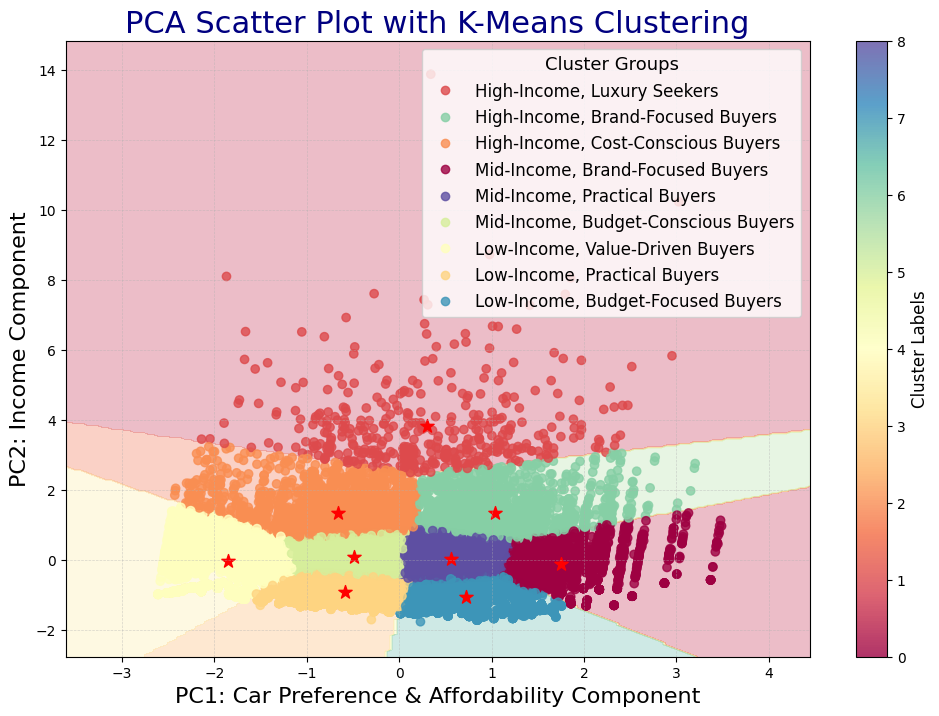

In [60]:
# Fit the best K-Means algorithm and assign cluster labels to DataFrame
algorithm = best_algorithm
algorithm.fit(X1_pca)
labels1 = algorithm.labels_
df['Cluster'] = labels1
centroids1 = algorithm.cluster_centers_

# Define descriptive names for each cluster
custom_cluster_names = [
    "Mid-Income, Brand-Focused Buyers",
    "High-Income, Luxury Seekers",
    "High-Income, Cost-Conscious Buyers",
    "Low-Income, Practical Buyers",
    "Low-Income, Value-Driven Buyers",
    "Mid-Income, Budget-Conscious Buyers",
    "High-Income, Brand-Focused Buyers",
    "Low-Income, Budget-Focused Buyers",
    "Mid-Income, Practical Buyers"
]

# Generate car brand and model recommendations for each cluster
cluster_recommendations = {}
for cluster in range(algorithm.n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    recommended_brands = cluster_data['Company'].value_counts().sort_values(ascending=False).head(3).index.tolist()
    brand_model_recommendations = {}
    for brand in recommended_brands:
        top_models = cluster_data[cluster_data['Company'] == brand]['Model'].value_counts().head(1).index.tolist()
        brand_model_recommendations[brand] = top_models
    cluster_recommendations[cluster] = brand_model_recommendations

# Print the car brand and model recommendations for each cluster
print("Car Brand and Model Recommendations for Each Cluster:")
for cluster, brand_models in cluster_recommendations.items():
    cluster_name = custom_cluster_names[cluster]
    print(f"{cluster_name}:")
    for brand, models in brand_models.items():
        print(f"  {brand}: {', '.join(models)}")

# Create mesh grid for visualizing K-Means clustering boundaries
x_min, x_max = X1_pca[:, 0].min() - 1, X1_pca[:, 0].max() + 1
y_min, y_max = X1_pca[:, 1].min() - 1, X1_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict cluster labels for each point in the mesh grid
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot PCA scatter plot with K-Means clustering
plt.figure(figsize=(12, 8))
plt.title('PCA Scatter Plot with K-Means Clustering', fontsize=22, color='navy')
plt.xlabel('PC1: Car Preference & Affordability Component', fontsize=16)
plt.ylabel('PC2: Income Component', fontsize=16)

# Plot the decision boundary by assigning a color to each cluster area
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Spectral')

# Plot data points and centroids
scatter = plt.scatter(X1_pca[:, 0], X1_pca[:, 1], c=labels1, cmap='Spectral', alpha=0.8)
plt.scatter(centroids1[:, 0], centroids1[:, 1], s=100, c='red', marker='*', label='Centroids')

# Add color bar for clusters
cbar = plt.colorbar(scatter, ax=plt.gca())
cbar.set_label('Cluster Labels', fontsize=12)

# Reorder the legend entries by income level and then by buyer type
cluster_order = [
    # High-Income Groups
    "High-Income, Luxury Seekers",
    "High-Income, Brand-Focused Buyers",
    "High-Income, Cost-Conscious Buyers",

    # Mid-Income Groups
    "Mid-Income, Brand-Focused Buyers",
    "Mid-Income, Practical Buyers",
    "Mid-Income, Budget-Conscious Buyers",

    # Low-Income Groups
    "Low-Income, Value-Driven Buyers",
    "Low-Income, Practical Buyers",
    "Low-Income, Budget-Focused Buyers"
]

handles, _ = scatter.legend_elements()
ordered_handles = [handles[custom_cluster_names.index(name)] for name in cluster_order]
plt.legend(ordered_handles, cluster_order, title="Cluster Groups", loc='upper right', fontsize=12, title_fontsize='13')

# Customize grid
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

### Predicting for the upcoming inputs

In [61]:
def recommend_car_for_new_customer(income, price):
    # Get the most frequent car model and encode it
    most_frequent_model = df['Model'].mode()[0]
    model_encoder = LabelEncoder().fit(df['Model'])
    model_encoded = model_encoder.transform([most_frequent_model])[0]

    # Get the most frequent car company and encode it
    most_frequent_company = df['Company'].mode()[0]
    company_encoder = LabelEncoder().fit(df['Company'])
    company_encoded = company_encoder.transform([most_frequent_company])[0]

    # Prepare the new customer's data for scaling and PCA transformation
    new_customer_data = np.array([[income, price, company_encoded, model_encoded]])
    new_customer_scaled = scaler.transform(new_customer_data)  # Standardize the new customer data
    new_customer_pca = pca.transform(new_customer_scaled)  # Apply PCA transformation
    predicted_cluster = best_algorithm.predict(new_customer_pca)[0]  # Predict the cluster
    cluster_name = custom_cluster_names[predicted_cluster]  # Get the descriptive cluster name

    # Filter cluster data to find relevant recommendations in the price range
    cluster_data = df[df['Cluster'] == predicted_cluster]
    price_lower_bound = price * 0.8  # Set lower price bound (80% of preferred price)
    price_upper_bound = price * 1.2  # Set upper price bound (120% of preferred price)
    price_filtered_data = cluster_data[(cluster_data['Price ($)'] >= price_lower_bound) &
                                       (cluster_data['Price ($)'] <= price_upper_bound)]

    # Decorated output
    print("\n=============================")
    print("🚗 CAR RECOMMENDATION SYSTEM")
    print("=============================\n")

    # If no cars are found in the desired price range
    if price_filtered_data.empty:
        print(f"No recommendations found in the price range of ${price_lower_bound:,.2f} - ${price_upper_bound:,.2f} for the '{cluster_name}' cluster.")
    else:
        # Provide car recommendations within the desired price range
        print(f"The new customer belongs to the '{cluster_name}' group.\n")
        print(f"Recommended Car Models in the Price Range ${price_lower_bound:,.2f} - ${price_upper_bound:,.2f}:\n")

        # Recommend top 5 car models from filtered data
        recommended_models = price_filtered_data.groupby(['Company', 'Model']).size().sort_values(ascending=False).head(5).index.tolist()
        for company, model in recommended_models:
            model_data = price_filtered_data[(price_filtered_data['Company'] == company) & (price_filtered_data['Model'] == model)]
            avg_price = model_data['Price ($)'].mean()
            body_type = model_data['Body Style'].mode()[0]
            transmission = model_data['Transmission'].mode()[0]
            print(f"  🚘 {company} {model}:")
            print(f"    - Average Price: ${avg_price:,.2f}")
            print(f"    - Body Type: {body_type}")
            print(f"    - Transmission: {transmission}\n")

# Get input from user for annual income and preferred price
print("Welcome to the Car Recommendation System!")
income = float(input("Enter your Annual Income (in dollars): "))
price = float(input("Enter your Preferred Price for a Car (in dollars): "))

# Make car recommendations for the new customer
recommend_car_for_new_customer(income, price)


Welcome to the Car Recommendation System!
Enter your Annual Income (in dollars): 2200000
Enter your Preferred Price for a Car (in dollars): 80000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



🚗 CAR RECOMMENDATION SYSTEM

The new customer belongs to the 'High-Income, Luxury Seekers' group.

Recommended Car Models in the Price Range $64,000.00 - $96,000.00:

  🚘 Cadillac Catera:
    - Average Price: $75,000.50
    - Body Type: Hatchback
    - Transmission: Auto

  🚘 Lincoln Continental:
    - Average Price: $82,000.33
    - Body Type: Passenger
    - Transmission: Manual

  🚘 Mercury Grand Marquis:
    - Average Price: $71,166.67
    - Body Type: SUV
    - Transmission: Manual

  🚘 Nissan Pathfinder:
    - Average Price: $75,167.67
    - Body Type: Hardtop
    - Transmission: Auto

  🚘 Oldsmobile Aurora:
    - Average Price: $71,166.67
    - Body Type: Passenger
    - Transmission: Manual

